In [4]:
import pandas as pd

df = pd.read_csv('data/total.csv')
df['Polygon'] = df['Polygon'].map(eval)

In [30]:
import numpy as np

def area(poly):
    return 0.5 * sum([np.cross(a, b) for a, b in zip(poly, poly[1:] + poly[:1])])
    
# print(area([[np.cos(a), np.sin(a)] for a in np.linspace(0, 2*np.pi, 10000)]))
df['Area'] = df['Polygon'].map(area)

In [48]:
import matplotlib
def show_polygons(ax, polygons, facecolor='white', alpha=1):
    patches = []
    for vertices in polygons:
        polygon = matplotlib.patches.Polygon(
            vertices,
            alpha=alpha, 
            ec='black',
            fc=facecolor,
            lw=1.5)
        patches.append(polygon)

    for patch in patches:
        ax.add_patch(patch)

    ax.autoscale()

count    185300.000000
mean          0.025842
std           0.024230
min           0.011082
25%           0.024225
50%           0.025322
75%           0.026477
max           0.446520
Name: Area, dtype: float64


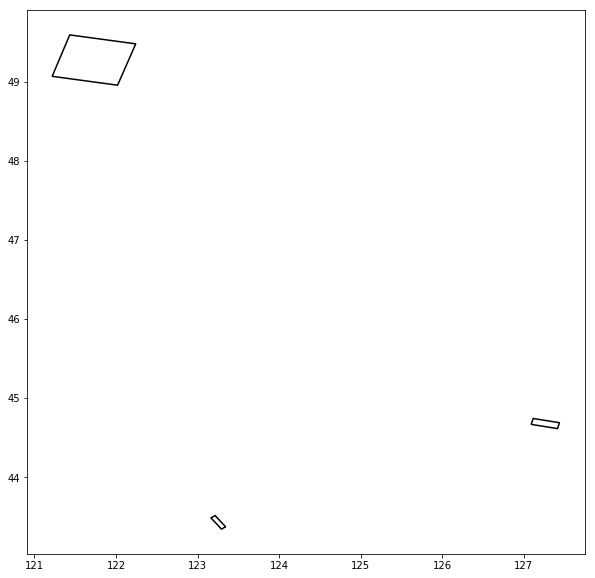

In [89]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
df = df.sort_values('Area')

min_area_polygon = df.iloc[0]['Polygon']
mid_area_polygon = df.iloc[len(df)//2]['Polygon']
max_area_polygon = df.iloc[-1]['Polygon']

print(df['Area'].describe())

show_polygons(ax, [min_area_polygon, mid_area_polygon, max_area_polygon], 'white')

(121.16575, 122.29325, 48.925600000000003, 49.6252)

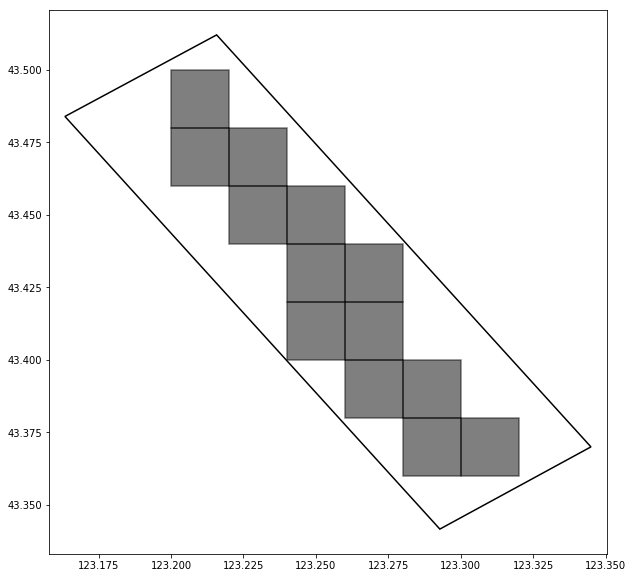

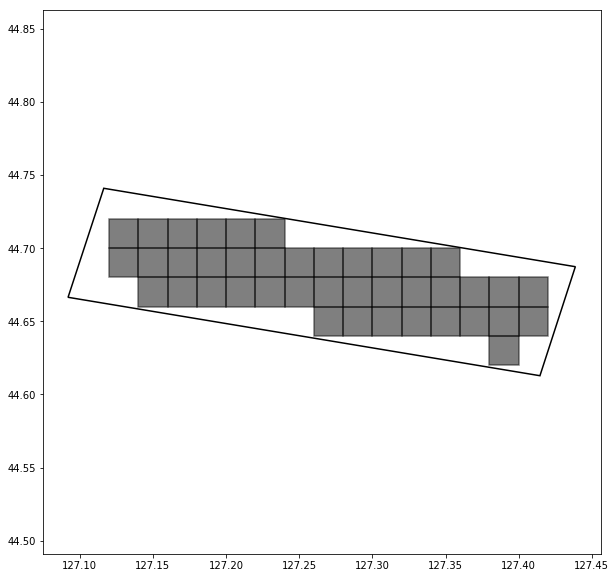

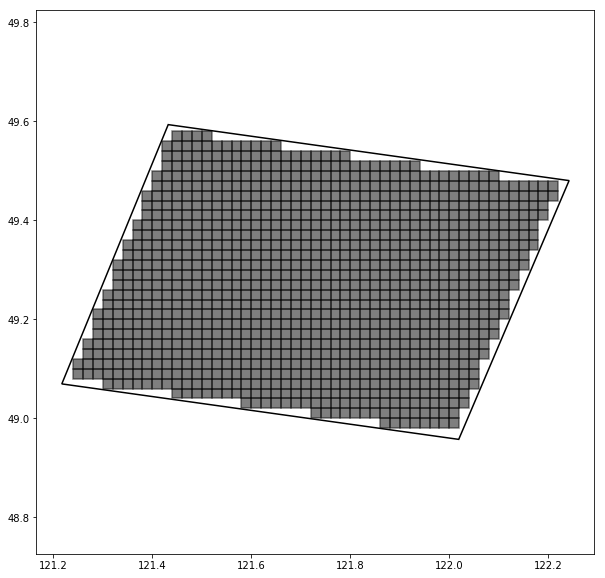

In [94]:
import matplotlib.path as mpltPath
from math import ceil, floor

def contains(polygon, point):
    return mpltPath.Path(polygon).contains_points([point])[0]

def generate_cells(poly, delta, keep_edge=False):
    min_trunc, max_trunc = ceil, floor
    if keep_edge:
        min_trunc, max_trunc = floor, ceil
        
    minxi = min_trunc(min([p[0] for p in poly]) / delta)
    minyi = min_trunc(min([p[1] for p in poly]) / delta)
    maxxi = max_trunc(max([p[0] for p in poly]) / delta)
    maxyi = max_trunc(max([p[1] for p in poly]) / delta)

    
    def generate_cell_poly(xi, yi):
        x = xi * delta
        y = yi * delta
        return [[x, y], [x + delta, y], [x + delta, y + delta], [x, y + delta]]
    
    ret = []
    
    cond = any if keep_edge else all
    
    for xi in range(minxi, maxxi):
        for yi in range(minyi, maxyi):
            cell = generate_cell_poly(xi, yi)
            if cond([contains(poly, p) for p in cell]):
                ret.append(cell)
                
    return ret

fig, ax = plt.subplots(figsize=(10, 10))
show_polygons(ax, [min_area_polygon], 'white')
show_polygons(ax, generate_cells(min_area_polygon, 0.02), 'black', 0.5)
plt.axis('equal')

fig, ax = plt.subplots(figsize=(10, 10))
show_polygons(ax, [mid_area_polygon], 'white')
show_polygons(ax, generate_cells(mid_area_polygon, 0.02), 'black', 0.5)
plt.axis('equal')

fig, ax = plt.subplots(figsize=(10, 10))
show_polygons(ax, [max_area_polygon], 'white')
show_polygons(ax, generate_cells(max_area_polygon, 0.02), 'black', 0.5)
plt.axis('equal')